In [1]:
import os
os.chdir('c:/bench/bst/data')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
edf=pd.read_csv('mi/elections.csv')
edf.head()

,id,date,description,birth_yr,score
0,31000153,2017-11-07,NOVEMBER CONSOLIDATED,1999,5
1,31000152,2017-08-08,AUGUST CONSOLIDATED,1999,5
2,31000151,2017-05-02,MAY CONSOLIDATED,1999,5
3,31000053,2016-11-08,STATE GENERAL,1998,1
4,31000052,2016-08-02,STATE PRIMARY,1998,4


In [11]:
cols = edf.date[0:15]

In [7]:
vdf=pd.read_csv('voters/Bruce_St_voters.csv')
vdf.head()

,last_name,first_name,middle_name,name_suffix,birth_year,gender,street_address,city,zipcode,county,...,2011-09-13,2011-08-02,2011-05-03,2011-02-22,2010-11-02,2010-09-14,2010-08-03,2010-05-04,2010-02-23,2010-02-08
0,RABLE,ZACHARY,ANDREW,NaN,1988,M,2015 MILLER AVE,ANN ARBOR,48103,81,...,N,N,N,N,Y,X,X,X,X,X
1,BIGGS,CURT,ELLIS,NaN,1965,M,1877 MILLER AVE,ANN ARBOR,48103,81,...,N,N,N,N,N,N,N,N,N,N
2,FLYNN,DENISE,M,NaN,1957,F,2133 MILLER AVE,ANN ARBOR,48103,81,...,N,N,N,N,Y,N,N,N,N,N
3,KIRCHNER,AUDREY,NaN,NaN,1945,F,2011 MILLER AVE,ANN ARBOR,48103,81,...,N,N,N,N,Y,N,Y,N,N,N
4,MAZUR,LORI,ANNE,NaN,1959,F,2035 MILLER AVE,ANN ARBOR,48103,81,...,N,N,N,N,N,N,N,N,N,N


In [12]:
tdf=vdf.loc[:,cols[0]:cols[14]]
tdf.head()

,2017-11-07,2017-08-08,2017-05-02,2016-11-08,2016-08-02,2016-05-03,2016-03-08,2015-11-03,2015-08-04,2015-05-05,2015-02-24,2014-11-04,2014-08-05,2014-05-06,2014-02-25
0,Y,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N
1,N,N,N,Y,N,N,Y,N,N,N,N,Y,N,N,N
2,N,N,N,Y,Y,N,N,Y,N,N,N,Y,N,N,N
3,Y,Y,N,Y,N,N,Y,N,Y,Y,N,Y,Y,N,N
4,N,N,N,Y,N,N,Y,N,N,N,N,Y,N,N,N


In [15]:

eligible = {}
voted = {}
pct = {}
for col in tdf.columns:
    eligible[col] = 0
    voted[col] = 0
    pct[col] = 0
# eligible    

In [16]:
for col in tdf.columns:
    cnts = tdf[col].value_counts()
    Y = cnts['Y'] if 'Y' in cnts else 0
    eligible[col] += cnts['N'] + Y
    voted[col] += Y
    # pct[col] = round((voted[col] / eligible[col]) * 100)
len(eligible)

15

In [17]:

dfdf=pd.DataFrame([eligible, voted, pct], index=['eligible', 'voted', 'percent'])

,2017-11-07,2017-08-08,2017-05-02,2016-11-08,2016-08-02,2016-05-03,2016-03-08,2015-11-03,2015-08-04,2015-05-05,2015-02-24,2014-11-04,2014-08-05,2014-05-06,2014-02-25
eligible,274,271,271,269,269,269,269,268,268,268,268,268,267,266,265
voted,112,77,53,179,80,63,139,50,69,104,0,166,96,78,0
percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Elections', ylabel='Voters'>

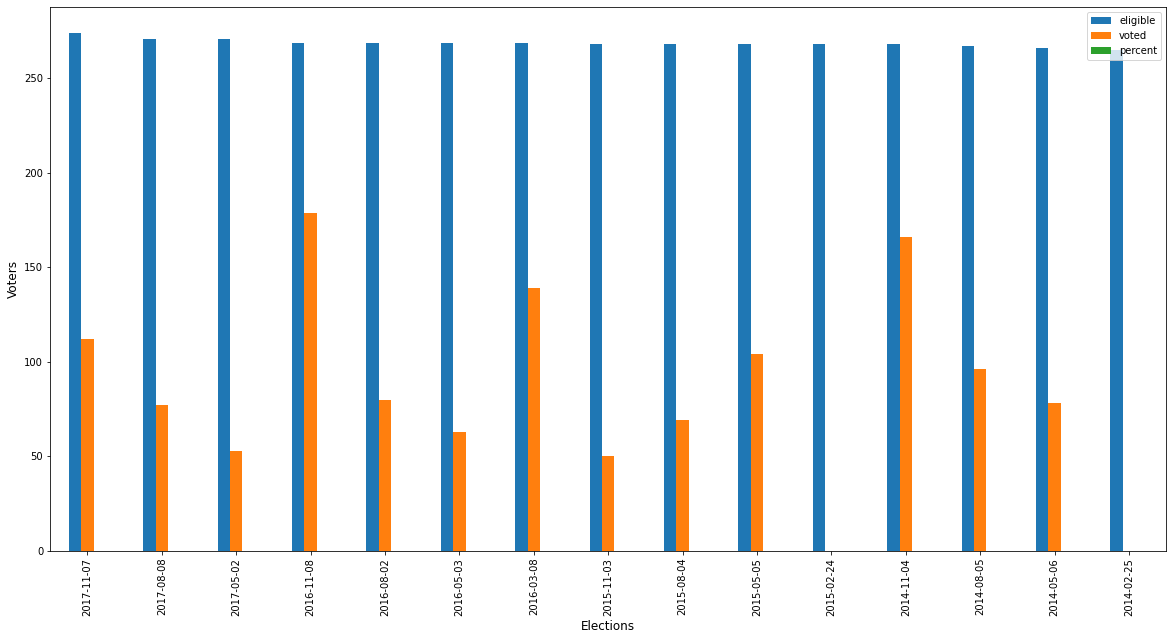

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylabel('Voters',fontsize=12)
ax.set_xlabel('Elections',fontsize=12)
df.T.plot.bar(ax=ax)